In [1]:
%pylab inline

import geomalgo as ga

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext Cython

In [3]:
%%cython
cimport geomalgo as ga
cdef:
    ga.CSegment2D seg

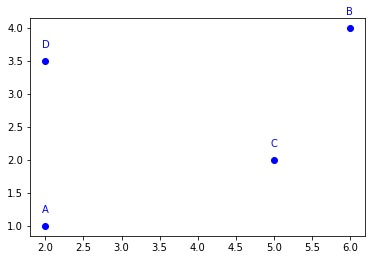

In [4]:
A = ga.Point2D(2, 1, name='A')
B = ga.Point2D(6, 4, name='B')

C = ga.Point2D(5, 2, name='C')
D = ga.Point2D(2, 3.5, name='D')

for obj in [A, B, C, D]:
    obj.plot()

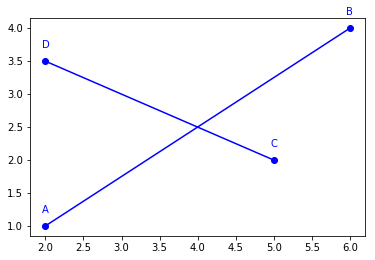

In [5]:
AB = ga.Segment2D(A, B)
CD = ga.Segment2D(C, D)

for obj in [A, B, C, D, AB, CD]:
    obj.plot()

Point2D(4.0, 2.5)
None


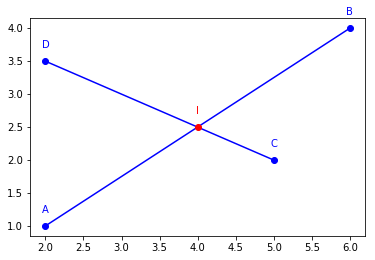

In [6]:
I0, I1 = AB.intersect_segment(CD)
print(I0)
print(I1)

for obj in [A, B, C, D, AB, CD]:
    obj.plot()
    
I0.plot(name='I', color='red')

In [7]:
I0, _, (AB_coord, CD_coord, _, _)  = AB.intersect_segment(CD, return_coords=True)
print(AB_coord, CD_coord)

0.5 0.3333333333333333


In [8]:
print(AB.at(AB_coord))
print(CD.at(CD_coord))

Point2D(4.0, 2.5)
Point2D(4.0, 2.5)


In [9]:
print(AB.where(I0))
print(CD.where(I0))

0.5
0.3333333333333333


In [10]:
%load_ext Cython
%load_ext wurlitzer

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [11]:
%%cython

import geomalgo as ga

A = ga.Point2D(2, 1, name='A')
B = ga.Point2D(6, 4, name='B')
C = ga.Point2D(5, 2, name='C')
D = ga.Point2D(2, 3.5, name='D')
AB = ga.Segment2D(A, B)
CD = ga.Segment2D(C, D)

I0, I1 = AB.intersect_segment(CD)
print(I0)
print(I1)

Point2D(4.0, 2.5)
None


In [12]:
%%cython

cimport geomalgo as ga

cdef:
    ga.Point2D A, B, C, D
    ga.Segment2D AB, CD
    
A = ga.Point2D(2, 1, name='A')
B = ga.Point2D(6, 4, name='B')
C = ga.Point2D(5, 2, name='C')
D = ga.Point2D(2, 3.5, name='D')
AB = ga.Segment2D(A, B)
CD = ga.Segment2D(C, D)

I0, I1 = AB.intersect_segment(CD)
print(I0)
print(I1)

Point2D(4.0, 2.5)
None


In [13]:
%%cython

from libc.stdio cimport printf

cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B, C, D, I0, I1
    ga.CSegment2D AB, CD
    double coords[4]
    int n
    
A.x, A.y = 2, 1
B.x, B.y = 6, 4

C.x, C.y = 5, 2
D.x, D.y = 2, 3.5

ga.segment2d_set(&AB, &A, &B)
ga.segment2d_set(&CD, &C, &D)

n = ga.intersect_segment2d_segment2d(&AB, &CD, &I0, &I1, coords)

printf("Number of intersection: %d\n", n)
printf("Intersection point: (%.2f, %.2f)\n", I0.x, I0.y)

Number of intersection: 1
Intersection point: (4.00, 2.50)


In [14]:
%%cython

cimport geomalgo as ga

cdef:
    ga.Point2D X
    ga.CPoint2D* C_X
    
X = ga.Point2D(1, 2)
    
C_X = X.cpoint2d

In [15]:
%%cython

cimport geomalgo as ga

cdef:
    ga.Point2D X, Y
    ga.Segment2D XY
    
X = ga.Point2D(1, 2)
Y = ga.Point2D(3, 4)

XY = ga.Segment2D(X, Y)

cdef:
    ga.CSegment2D* C_XY
    ga.CPoint2D* C_X
    ga.CPoint2D* C_Y
    
C_XY = &XY.csegment2d

# Points can be accessed via X and Y
C_X = X.cpoint2d

# Or via C_XY
C_Y = C_XY.B

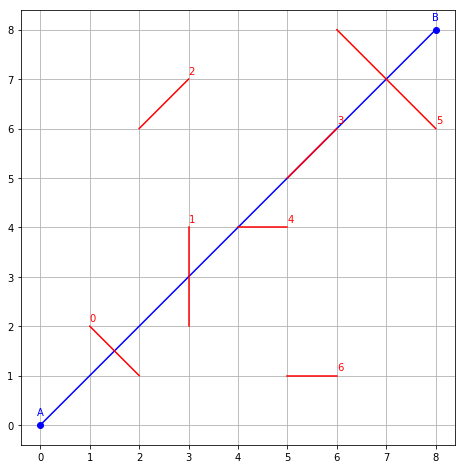

In [16]:
A = ga.Point2D(0, 0, name='A')
B = ga.Point2D(8, 8, name='B')
AB = ga.Segment2D(A, B)
    
segment_list = [
    ga.Segment2D((2,1), (1,2)),
    ga.Segment2D((3,2), (3,4)),
    ga.Segment2D((2,6), (3,7)),
    ga.Segment2D((5,5), (6,6)),
    ga.Segment2D((4,4), (5,4)),
    ga.Segment2D((6,8), (8,6)),
    ga.Segment2D((5,1), (6,1)),
]

figure(figsize=(8,8))

def plot_segments():
    for obj in [A, B, AB]:
        obj.plot()

    for i, seg in enumerate(segment_list):
        seg.plot(style='r-')
        text(seg.B.x, seg.B.y+0.1, i, color='red')
   
plot_segments()
axis('scaled')
grid()

In [17]:
xa = np.array([seg.A.x for seg in segment_list], dtype='d')
xb = np.array([seg.B.x for seg in segment_list], dtype='d')

ya = np.array([seg.A.y for seg in segment_list], dtype='d')
yb = np.array([seg.B.y for seg in segment_list], dtype='d')

segments = ga.Segment2DCollection(xa, xb, ya, yb)

In [18]:
%%cython

from libc.stdio cimport printf

cimport geomalgo as ga

def iter_segments(ga.Segment2DCollection segments):
    cdef:
        ga.CSegment2D PQ
        ga.CPoint2D P, Q
        int S

    ga.segment2d_set(&PQ, &P, &Q)

    for S in range(segments.size):
        segments.get(S, &PQ)
        printf("(%.0f, %.0f), (%.0f, %.0f)\n", P.x, P.y, Q.x, Q.y)

In [19]:
iter_segments(segments)

(2, 1), (1, 2)
(3, 2), (3, 4)
(2, 6), (3, 7)
(5, 5), (6, 6)
(4, 4), (5, 4)
(6, 8), (8, 6)
(5, 1), (6, 1)


In [20]:
%%cython

import numpy as np
cimport geomalgo as ga

def compute_intersections(ga.Segment2D AB, ga.Segment2DCollection segments):
    cdef:
        ga.CSegment2D PQ
        ga.CPoint2D P, Q
        ga.CPoint2D I0, I1
        double coords[4]
        int S, C
        
        # Count of intersections for each segment. May be 0, 1 or 2.
        int[:] count = np.empty(segments.size, dtype='int32')
        int countmax = 2
        
        # Intersection coordinate relative to AB.
        double[:,:] coord = np.empty((segments.size, countmax), dtype='d')
        
    ga.segment2d_set(&PQ, &P, &Q)

    for S in range(segments.size):
        segments.get(S, &PQ)
        count[S] = ga.intersect_segment2d_segment2d(&AB.csegment2d,
                                                    &PQ, &I0, &I1, coords)
        for C in range(count[S]):
            coord[S,C] = coords[C*2]
            
    return np.asarray(count), np.asarray(coord)

In [21]:
counts, coords = compute_intersections(AB, segments)

In [22]:
print(counts)
print(coords)

[1 1 0 2 1 1 0]
[[  1.87500000e-001   2.64239983e-316]
 [  3.75000000e-001   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  6.25000000e-001   7.50000000e-001]
 [  5.00000000e-001   0.00000000e+000]
 [  8.75000000e-001   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]]


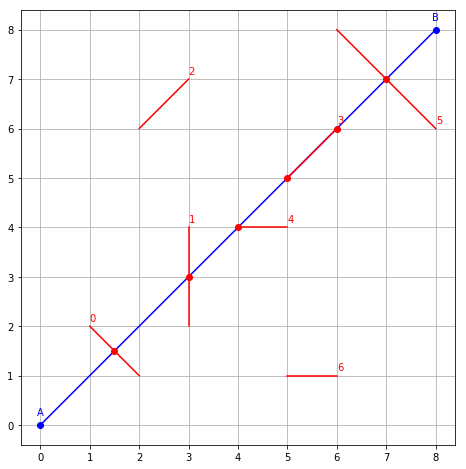

In [23]:
figure(figsize=(8,8))
plot_segments()
grid()
axis('scaled')

for S, (count, coord) in enumerate(zip(counts, coords)):
    for C in range(count):
        coord = coords[S, C]
        P = AB.at(coord)
        plot(P.x, P.y, 'ro')